#  Import Libraries

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [5]:
#Reading the data and storing in raw_data
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
#Describing the data
raw_data.describe(include ='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
#storing all the features of raw_data except model in data
data=raw_data.drop(['Model'],axis=1)
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [8]:
#Checkinh whether data is null 
data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [9]:
#Checking sumof data that are null
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
#Dropping missing values in data set
data_no_mv=data.dropna(axis=0)
data_no_mv

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985


In [11]:
#Describing data_no_mv
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


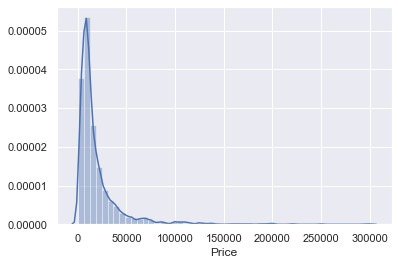

In [12]:
#Plotting graph
sns.distplot(data_no_mv['Price'])

In [13]:
#Storing values if those whose price is less than q or 0.99 
q=data_no_mv['Price'].quantile(0.99)
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


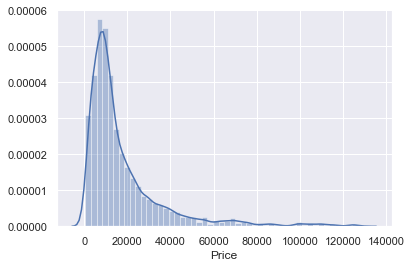

In [14]:
#plotting graph after changes in data and storing values in data1
sns.distplot(data_1['Price'])

In [15]:
#Storing values which are lesss than 0.99 or q in data_2
q=data_1['Year'].quantile(0.99)
data_2=data_1[data_1['Year']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3798,3798.000000,3798,3798.000000,3798.000000,3798,3798,3798.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,849,NaN,1482,NaN,NaN,1729,3427,NaN
mean,NaN,15830.242335,NaN,173.127435,2.761761,NaN,NaN,2005.817536
std,NaN,15442.971748,NaN,98.498619,5.071974,NaN,NaN,6.470299
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,102.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10825.000000,NaN,164.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19300.000000,NaN,235.000000,3.000000,NaN,NaN,2011.000000


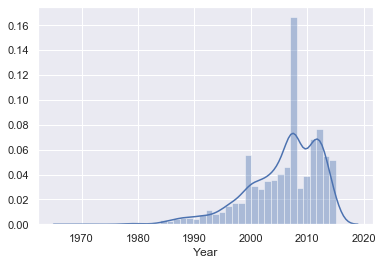

In [16]:
#plotting graph of data2 w.r.t to year
sns.distplot(data_2['Year'])

In [17]:
#Storing values which are lesss than 0.99 or q in data_3
q=data_1['Mileage'].quantile(0.99)
data_3=data_1[data_1['Mileage']<q]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


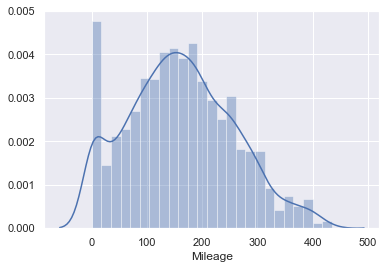

In [18]:
#plotting graph of data3 w.r.t to mileage
sns.distplot(data_3['Mileage'])

In [19]:
#Storing values which are less than 6.5 in data_4
data_4=data_2[data_2['EngineV']<6.5]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3775,3775.000000,3775,3775.000000,3775.000000,3775,3775,3775.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,844,NaN,1470,NaN,NaN,1722,3410,NaN
mean,NaN,15874.075335,NaN,172.986225,2.445971,NaN,NaN,2005.830728
std,NaN,15468.397080,NaN,98.576161,0.949582,NaN,NaN,6.470733
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,102.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,164.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,19500.000000,NaN,235.000000,3.000000,NaN,NaN,2011.000000


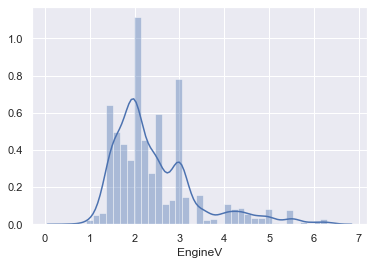

In [20]:
#plotting graph of data3 w.r.t to EngineV
sns.distplot(data_4['EngineV'])

In [21]:
#Cleaning Data
data_cleaned=data_4.reset_index(drop=True)

In [22]:
#After data cleaning displaying first 5 rows
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


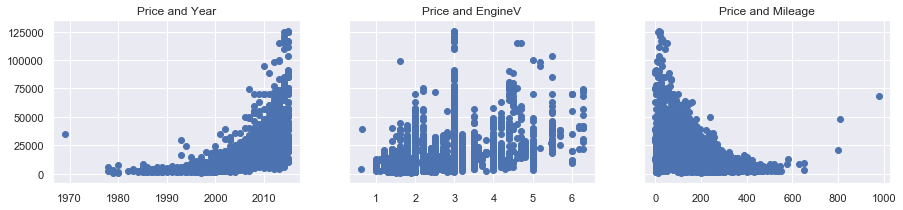

In [23]:
#Plotting graph
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

In [24]:
#Changing price to logprice
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']='log_price'
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,log_price
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,log_price
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,log_price
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,log_price
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,log_price
...,...,...,...,...,...,...,...,...,...
3770,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,log_price
3771,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,log_price
3772,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,log_price
3773,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,log_price


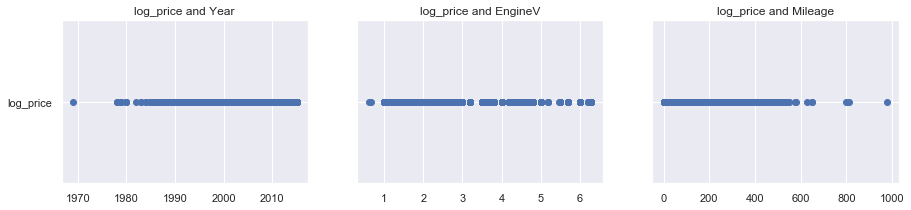

In [30]:
#plotting graph after changing price to log price
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')


plt.show()

In [26]:
#data_cleaned=data_cleaned.drop(['Price'],axis=1)
#data_cleaned
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,log_price
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,log_price
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,log_price
3,Audi,crossover,240,4.2,Petrol,yes,2007,log_price
4,Toyota,crossover,120,2.0,Petrol,yes,2011,log_price


In [27]:
#Checking values of columns of data_cleaned
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [29]:
vif

,VIF,Features
0,4.052010,Mileage
1,10.689391,Year
2,7.638053,EngineV
